In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
pwd

'/Users/thanhng'

In [3]:
cd /Users/thanhng/osteo_project

/Users/thanhng/osteo_project


In [4]:
data = pd.read_csv('osteo_clean.csv')
print(data.shape)
data.head()

(61022, 46)


,Strata,sex,race_combine,Age_combine,osteo_predict,BMI_Avg_imputed,Alcohol_Prior,Tobacco_Prior,Drug_antipsych_prior,Drug_Estrogens_prior,...,Sodium_Worst_Prior_decile,Sodium_Worst_Ever_decile,Calcium_Closest_Osteo_cat,Calcium_Avg_Prior_cat,Calcium_Avg_Ever_cat,Sodium_Closest_Osteo_cat,Sodium_Avg_Prior_cat,Sodium_Avg_Ever_cat,Sodium_Worst_Prior_cat,Sodium_Worst_Ever_cat
0,9576,F,black,from_50_to_70,0.0,37.834028,0,0,0,0,...,NaN,5.0,0,0,1,0,0,1,0,1
1,13833,F,white,from_70_to_80,0.0,32.948625,0,0,0,0,...,NaN,9.0,0,0,1,0,0,1,0,1
2,28858,F,black,from_30_to_50,0.0,33.388021,0,0,0,0,...,NaN,4.0,0,0,1,0,0,1,0,1
3,16496,F,others,from_50_to_70,0.0,28.308928,1,0,0,0,...,9.0,9.0,1,1,1,1,1,1,1,1
4,1,F,white,more_than_80,1.0,22.666667,0,0,1,0,...,4.0,2.0,1,1,1,1,1,1,1,1


In [5]:
data.isna().sum()

Strata                              0
sex                                 0
race_combine                        0
Age_combine                         0
osteo_predict                       0
BMI_Avg_imputed                     0
Alcohol_Prior                       0
Tobacco_Prior                       0
Drug_antipsych_prior                0
Drug_Estrogens_prior                0
Drug_Glucocorticoids_prior          0
Drug_Nsaids_prior                   0
Drug_Opiates_prior                  0
Drug_Thiazide_prior                 0
Drug_Loop_Diuretic_Prior            0
Drug_Pp_inhibitors_prior            0
Drug_Progesterone_prior             0
Drug_Seizure_prior                  0
Drug_Ssris_prior                    0
Drug_Tc_antidepress_prior           0
HeartDisease_Prior                  0
Liver_Prior                         0
PulmDisease_Prior                   0
CNS_Disease_Prior                   0
Malignancy_Prior                    0
Hyponatremia_Prior                  0
Chronic_Hypo

In [6]:
data.dtypes

Strata                            int64
sex                              object
race_combine                     object
Age_combine                      object
osteo_predict                   float64
BMI_Avg_imputed                 float64
Alcohol_Prior                     int64
Tobacco_Prior                     int64
Drug_antipsych_prior              int64
Drug_Estrogens_prior              int64
Drug_Glucocorticoids_prior        int64
Drug_Nsaids_prior                 int64
Drug_Opiates_prior                int64
Drug_Thiazide_prior               int64
Drug_Loop_Diuretic_Prior          int64
Drug_Pp_inhibitors_prior          int64
Drug_Progesterone_prior           int64
Drug_Seizure_prior                int64
Drug_Ssris_prior                  int64
Drug_Tc_antidepress_prior         int64
HeartDisease_Prior                int64
Liver_Prior                       int64
PulmDisease_Prior                 int64
CNS_Disease_Prior                 int64
Malignancy_Prior                  int64


### EDA

This dataset is used for a `case-control study`, controlling for demographic variables such as `age`, `sex`, and `gender`. Thus, we expect that there will not be different in the `Y` label of these demographic variables

In [41]:
#create a copy of Y for the sake of visualization
data['osteo_label'] = data['osteo_predict'].replace({1.0: 'osteo', 0.0: 'no_osteo'})
data['osteo_label'].value_counts()

osteo       30511
no_osteo    30511
Name: osteo_label, dtype: int64

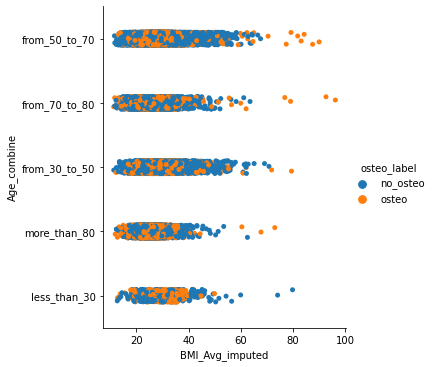

In [42]:
sns.catplot(x="BMI_Avg_imputed", y="Age_combine", hue='osteo_label', data=data)

the data is distributed equally between 2 classes of Y label (`no_osteo` and `osteo`). This is expected because our data is matched based on age variable

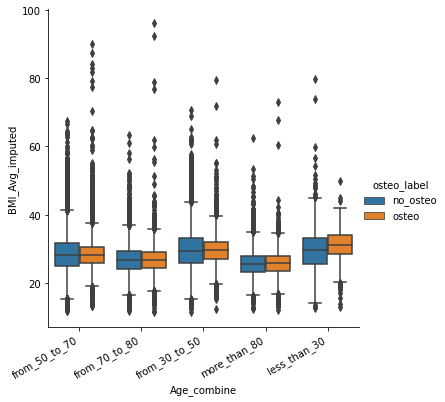

In [50]:
ax = sns.catplot(y="BMI_Avg_imputed", x="Age_combine", hue='osteo_label', data=data, kind='box')
ax.set_xticklabels( rotation=30, ha="right")

`BMI_Avg_imputed` is higher in group `70_80` than in other groups. But the means of these BMI of the different groups are closely near each other, suggesting that there are not much different in these `age groups`

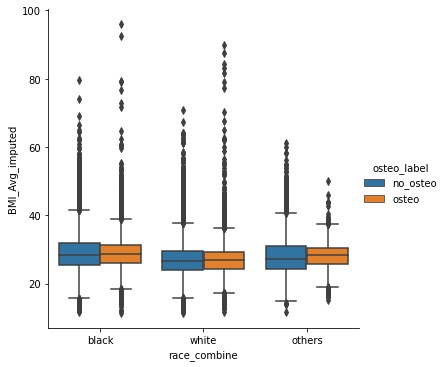

In [44]:
sns.catplot(y="BMI_Avg_imputed", x="race_combine", hue='osteo_label', data=data, kind='box')

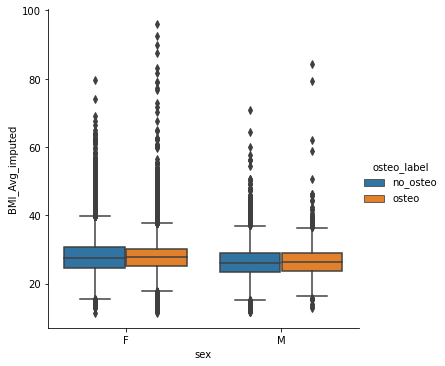

In [45]:
sns.catplot(y="BMI_Avg_imputed", x="sex", hue='osteo_label', data=data, kind='box')

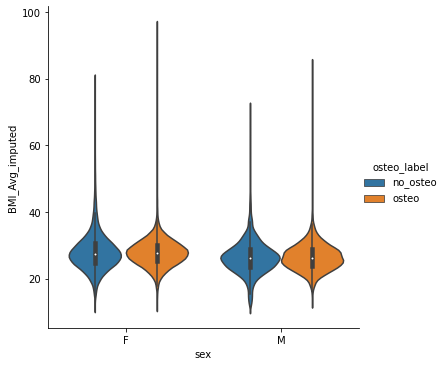

In [46]:
sns.catplot(y="BMI_Avg_imputed", x="sex", hue='osteo_label', data=data, kind='violin')

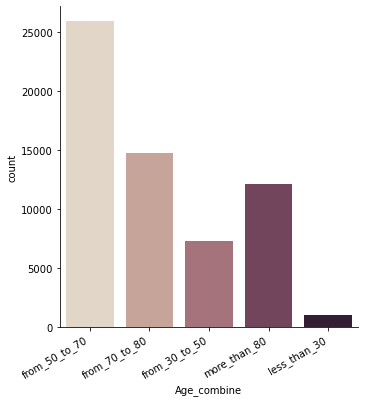

In [49]:
ax = sns.catplot(x="Age_combine", kind="count", palette="ch:.25", data=data)
ax.set_xticklabels( rotation=30, ha="right")

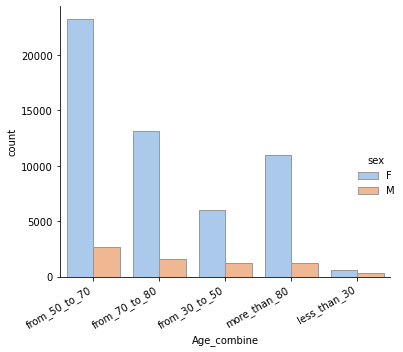

In [48]:
ax = sns.catplot(x="Age_combine", kind="count", hue="sex",
            palette="pastel", edgecolor=".6",data=data)    
ax.set_xticklabels( rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Perform `univariate feature selection` using `Chi-square` test since all these variables are categorical variables

To do this, we need to convert categorical variables with `string` into `number representatives` 

In [26]:
data['sex_category'] = data['sex'].copy()
data['sex_category'] = data['sex_category'].replace({'F':1, 'M':0})
data['sex_category'].value_counts()

1    53852
0     7170
Name: sex_category, dtype: int64

In [27]:
#convert race
data['race_combine'].value_counts()

white     36438
black     17256
others     7328
Name: race_combine, dtype: int64

In [28]:
data['race_category'] = data['race_combine'].copy()
data['race_category'] = data['race_category'].replace({'white': '0', 'black':'1', 'others':'2'})
data['race_category'].value_counts()

0    36438
1    17256
2     7328
Name: race_category, dtype: int64

In [29]:
#convert age
data['Age_combine'].value_counts().sort_index()

from_30_to_50     7264
from_50_to_70    25908
from_70_to_80    14712
less_than_30       984
more_than_80     12154
Name: Age_combine, dtype: int64

In [30]:
data['age_category'] = data['Age_combine'].copy()
data['age_category']= data['age_category'].replace({
    'less_than_30': '0',
    'from_30_to_50':'1',
    'from_50_to_70': '2', 
    'from_70_to_80': '3',
    'more_than_80': '4'  
})
data['age_category'].value_counts().sort_index()

0      984
1     7264
2    25908
3    14712
4    12154
Name: age_category, dtype: int64

In [31]:
#fill missing with 0 in multiple cols
lst_col = ['Calcium_Closest_Osteo_decile','Calcium_Avg_Prior_decile', 
        'Sodium_Avg_Prior_decile', 'Sodium_Worst_Prior_decile', 'Sodium_Worst_Ever_decile']
data[lst_col] = data[lst_col].fillna(0).astype(str)

In [32]:
data.isna().sum()

Strata                          0
sex                             0
race_combine                    0
Age_combine                     0
osteo_predict                   0
BMI_Avg_imputed                 0
Alcohol_Prior                   0
Tobacco_Prior                   0
Drug_antipsych_prior            0
Drug_Estrogens_prior            0
Drug_Glucocorticoids_prior      0
Drug_Nsaids_prior               0
Drug_Opiates_prior              0
Drug_Thiazide_prior             0
Drug_Loop_Diuretic_Prior        0
Drug_Pp_inhibitors_prior        0
Drug_Progesterone_prior         0
Drug_Seizure_prior              0
Drug_Ssris_prior                0
Drug_Tc_antidepress_prior       0
HeartDisease_Prior              0
Liver_Prior                     0
PulmDisease_Prior               0
CNS_Disease_Prior               0
Malignancy_Prior                0
Hyponatremia_Prior              0
Chronic_Hyponatremia            0
Recent_Hyponatremia             0
Median_Recent_Hypo_Cat_edit     0
Lowest_Recent_

In [35]:
df_features_cat = data.drop(['Strata', 'sex', 'race_combine',
                             'Age_combine', 'osteo_predict','BMI_Avg_imputed'], axis=1)

In [36]:
#perform Chi-square test
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features_cat, data['osteo_predict'])
selected_features = df_features_cat.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['Chronic_Hyponatremia', 'Recent_Hyponatremia', 'Median_Recent_Hypo_Cat_edit', 'Lowest_Recent_Hypo_Cat_edit', 'Calcium_Avg_Ever_decile']


In [39]:
correlation_score_df = pd.DataFrame(zip(feature_selection.scores_, feature_selection.pvalues_), index=df_features_cat.columns).reset_index()
correlation_score_df.columns=['variables', 'chi2_score', 'chi2_pvalue']
correlation_score_df

,variables,chi2_score,chi2_pvalue
0,Alcohol_Prior,35.041667,3.227251e-09
1,Tobacco_Prior,236.966851,1.803369e-53
2,Drug_antipsych_prior,76.379679,2.340473e-18
3,Drug_Estrogens_prior,19.043103,1.277988e-05
4,Drug_Glucocorticoids_prior,233.095174,1.259957e-52
5,Drug_Nsaids_prior,91.570916,1.076638e-21
6,Drug_Opiates_prior,395.455300,5.373691e-88
7,Drug_Thiazide_prior,88.356643,5.465574e-21
8,Drug_Loop_Diuretic_Prior,60.984050,5.753911e-15
9,Drug_Pp_inhibitors_prior,269.300643,1.611877e-60


Because this `sample size` is large, the `Chi-square test` is likely to 
return a low p-value even for a table with small differences from the expected proportions.


In [95]:
X = pd.DataFrame(feature_selection.transform(df_features_cat),
                 columns=selected_features)
X.head()

,Chronic_Hyponatremia,Recent_Hyponatremia,Median_Recent_Hypo_Cat_edit,Lowest_Recent_Hypo_Cat_edit,Calcium_Avg_Ever_decile
0,0,0,0.0,0.0,9
1,0,0,0.0,0.0,5
2,0,0,0.0,0.0,0
3,0,0,0.0,0.0,9
4,0,0,0.0,0.0,5


### Check `correlation` to see what variables are correlated to each other

<AxesSubplot:>

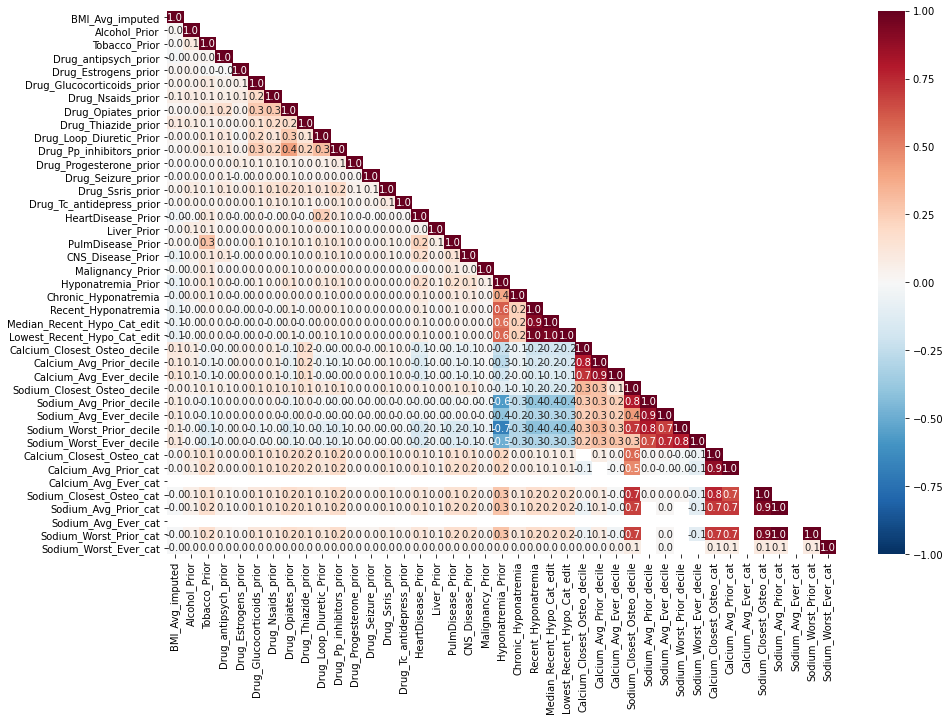

In [11]:
# Create correlation matrix
#remove 'strata' and Y
data_corr = data.drop(['Strata', 'osteo_predict'], axis=1)
corr_mat = data_corr.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

<AxesSubplot:>

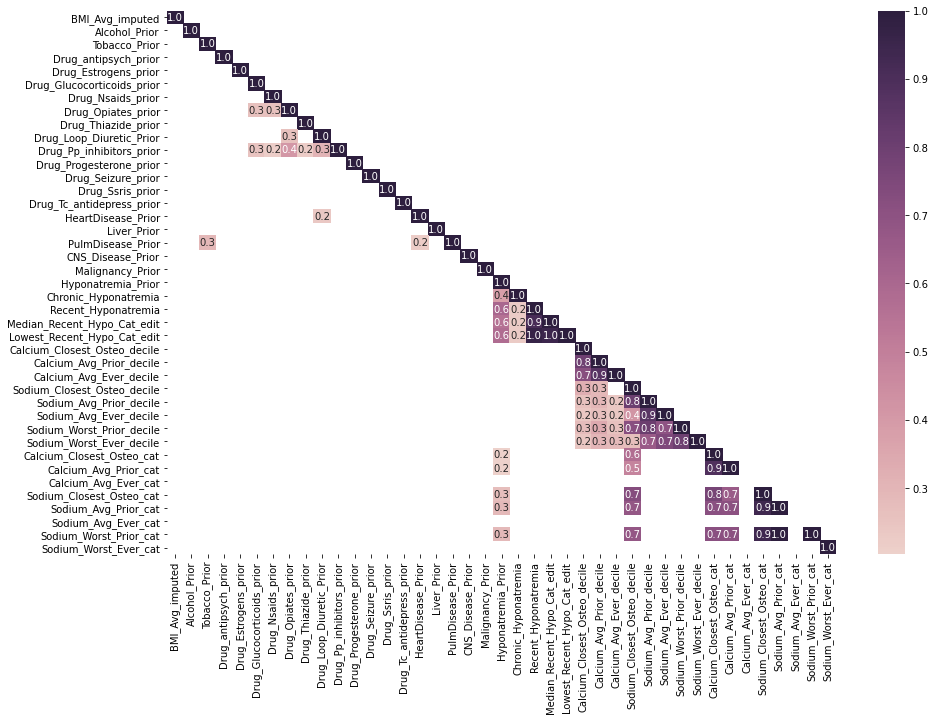

In [12]:
#check for correlation score that larger than 0.2
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.2], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

<AxesSubplot:>

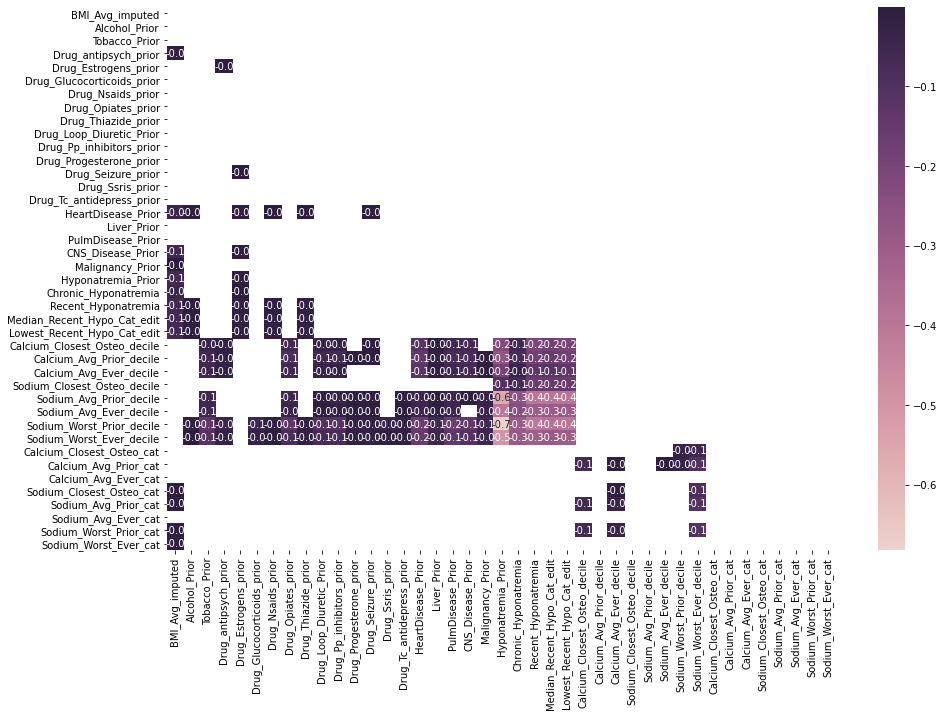

In [13]:
#check for correlation score that are negative
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat < 0.0], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

### OHE

- dummy: dtype = uint8, when input to ML, can't decode
Thus, we use OHE sklearn

In [59]:
from sklearn.preprocessing import OneHotEncoder
def CONVERT_TO_OHE(original_data):
    non_ohe = original_data.drop(['sex','race_combine', 'Age_combine',
                                  'Strata','BMI_Avg_imputed', 'osteo_predict'], axis=1)
    #convert non_ohe to string
    non_ohe = non_ohe.astype(str)
    enc = OneHotEncoder(drop='first')
    enc_fit = enc.fit_transform(non_ohe)
    col_names = enc.get_feature_names(non_ohe.columns)
    ohe_df = pd.DataFrame(enc_fit.toarray(), columns=col_names)
    #combine with original data
    combine = original_data[['Strata','BMI_Avg_imputed', 'osteo_predict']]
    data_ohe = pd.concat([ohe_df, combine], axis=1) 
    return data_ohe

### train models: `LR`, `RF`, `SVM`, `Adaboost`, `XGB`

We choose these models because majority of our variables are category. And some of them are slightly correlated to each other, thus we don't use `Naive Bayes` here because `NB` assumption may be violated. 

The `confusion matrix` follows this order: 

|negative class| positive class|
| ------------- |-------------|
| TN| FP| 
| FN | TP |

In [70]:
from sklearn.model_selection import KFold, cross_val_predict, cross_validate
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, roc_curve

from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

#########
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [71]:
def TRAIN_MODEL_ML(data_ohe, classifier, tune):
    X = data_ohe.drop(['osteo_predict'], axis=1)
    Y = data_ohe.filter(['Strata', 'osteo_predict'])

    fold = KFold(10, shuffle = True, random_state = 12345)
    strata = data_ohe['Strata'].unique()

    all_preds = np.full(data.shape[0], 100)
    probability = np.ones(data.shape[0])

    training_acc = []
    testing_acc = []

    for train_index, test_index in fold.split(strata):

        train_index_strata = strata[train_index]
        test_index_strata = strata[test_index]

        X_train = X.loc[X['Strata'].isin(train_index_strata)]
        X_train = X_train.drop(['Strata'], axis = 1)

        X_test = X.loc[X['Strata'].isin(test_index_strata)]
        X_test = X_test.drop(['Strata'], axis = 1)

        y_train = Y.loc[Y['Strata'].isin(train_index_strata)]['osteo_predict']
        y_test = Y.loc[Y['Strata'].isin(test_index_strata)]['osteo_predict']


        if classifier == 'LR':
            lr = LogisticRegression(solver='liblinear')
            
        if classifier == 'RF':
            # Create a based model
            lr = RandomForestClassifier(random_state = 12345)
            if tune == 'true':
                param_grid = {
                    'bootstrap': [True],
                    'max_depth': [80, 90, 100, 110],
                    'max_features': [2, 3],
                    'min_samples_leaf': [3, 4, 5],
                    'min_samples_split': [8, 10, 12],
                    'n_estimators': [100, 200, 300, 1000]
                            }
                # Instantiate the grid search model
                grid_search = GridSearchCV(estimator = lr, param_grid = param_grid,
                                          cv = 3, n_jobs = -1, verbose = 1)
                # Fit the grid search to the data
                grid_search.fit(X_train, y_train)
                print(grid_search.best_params_)

                best_grid = grid_search.best_estimator_
                grid_accuracy = evaluate(best_grid, X_test, y_test)
                print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

        if classifier == 'SVM_linear':
           svm_linear = LinearSVC(max_iter = 1000, random_state = 12345, C = 0.001, loss='hinge')
           lr = CalibratedClassifierCV(svm_linear)

        if classifier == 'SVM_rbf':
            lr = svm.SVC(kernel='rbf', probability = True, max_iter = 1000, C= 100, gamma = 30)

        if classifier == 'AdaBoost':
            logistic_regression = linear_model.LogisticRegression(random_state = 12345, solver = 'lbfgs')
            lr = AdaBoostClassifier(n_estimators=100,
                                    base_estimator = logistic_regression,
                                    learning_rate=1)

        if classifier == 'XGB':
            lr =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                             max_depth=3, random_state=42)

        fit = lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        all_preds[y_test.index] = y_pred

        probs = lr.predict_proba(X_test)
        probability[y_test.index] = probs[:, 1]

        training_acc.append(fit.score(X_train, y_train))
        testing_acc.append(fit.score(X_test, y_test))

    data['all_pred'] = all_preds
    data['probability'] = probability
    print('\nfinal result of %s model: ' % classifier)
    print(classification_report(data['osteo_predict'], data['all_pred']), '\n')
    print(confusion_matrix(data['osteo_predict'], data['all_pred']), '\n')

    print('ROC_AUC of', classifier, '', roc_auc_score(data['osteo_predict'], data['probability']))
    return data, training_acc, testing_acc, lr

In [72]:
def RUN_MULTIPLE_MODELS(data, classifiers, tune):
    result = []
    for classifier in classifiers:
        data_OHE = CONVERT_TO_OHE(data)
        data_ohe['osteo_predict'] = data_ohe['osteo_predict'].astype(str).replace({'0.0': '0', '1.0': '1'})
        model_data, train_acc, test_acc, clf = TRAIN_MODEL_ML(data_OHE, classifier, tune)
        fpr,tpr,threshold=roc_curve(model_data['osteo_predict'], model_data['probability'])
        auc = roc_auc_score(model_data['osteo_predict'], model_data['probability'])
        result.append({'classifier': classifier,
                          'FPR': fpr,
                          'TPR': tpr,
                          'AUC': auc,
                          'training_acc': train_acc,
                          'testing_acc': test_acc})

    result_df = pd.DataFrame(result, columns=['classifier','FPR','TPR','AUC',
                                      'training_acc', 'testing_acc'])

    result_df.set_index('classifier', inplace=True)
    return result_df

In [66]:
def PLOT_MULTIPLE_ROC(result_df):
    #plot multiple AUC in 1 plot
    fig = plt.figure(figsize=(8,6))
    for i in result_df.index:
        plt.plot(result_df.loc[i]['FPR'],
                 result_df.loc[i]['TPR'],
                 label="{}, AUC={:.3f}".format(i, result_df.loc[i]['AUC']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Comparison', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()

In [63]:
data_train_model = data.drop(['sex_category', 'race_category', 'age_category', 'osteo_label'], 
                            axis=1)

In [64]:
classifiers = ['LR', 'RF']
lr_res = RUN_MULTIPLE_MODELS(data_train_model, classifiers, 'false')


final result of LR model: 
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74     30511
         1.0       0.75      0.68      0.71     30511

    accuracy                           0.72     61022
   macro avg       0.73      0.72      0.72     61022
weighted avg       0.73      0.72      0.72     61022
 

[[23474  7037]
 [ 9799 20712]] 

ROC_AUC of LR  0.8088236758353666

final result of RF model: 
              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72     30511
         1.0       0.73      0.68      0.70     30511

    accuracy                           0.71     61022
   macro avg       0.72      0.71      0.71     61022
weighted avg       0.72      0.71      0.71     61022
 

[[22843  7668]
 [ 9744 20767]] 

ROC_AUC of RF  0.7939774953285219


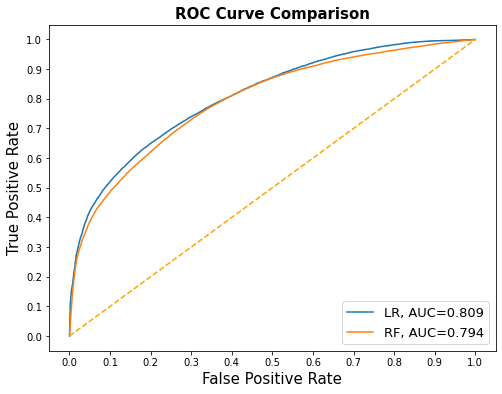

In [67]:
PLOT_MULTIPLE_ROC(lr_res)

- `LR` performs better than `RF` with its higher `AUC`. This also suggests that our data is biased toward linear model `LR` rathan than non-linear model `RF`
- according to the `confusion matrix` of these 2 models, our variables are biased towards negative class since the `TN` and `FN` are higher than the `TP` and `FP`. 

In [73]:
classifiers = ['SVM_linear', 'SVM_rbf']
svm = RUN_MULTIPLE_MODELS(data_train_model, classifiers, 'false')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration


final result of SVM_linear model: 
              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70     30511
         1.0       0.72      0.59      0.65     30511

    accuracy                           0.68     61022
   macro avg       0.68      0.68      0.68     61022
weighted avg       0.68      0.68      0.68     61022
 

[[23339  7172]
 [12399 18112]] 

ROC_AUC of SVM_linear  0.7416086534360626


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa


final result of SVM_rbf model: 
              precision    recall  f1-score   support

         0.0       0.50      0.99      0.67     30511
         1.0       0.57      0.01      0.02     30511

    accuracy                           0.50     61022
   macro avg       0.54      0.50      0.34     61022
weighted avg       0.54      0.50      0.34     61022
 

[[30249   262]
 [30157   354]] 

ROC_AUC of SVM_rbf  0.5085043612411497


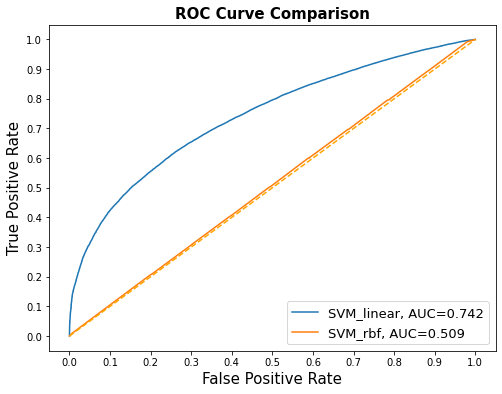

In [74]:
PLOT_MULTIPLE_ROC(svm)

In [75]:
classifiers = ['AdaBoost', 'XGB']
boosted_models = RUN_MULTIPLE_MODELS(data_train_model, classifiers, 'false')


final result of AdaBoost model: 
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.71     30511
         1.0       0.73      0.59      0.65     30511

    accuracy                           0.68     61022
   macro avg       0.69      0.68      0.68     61022
weighted avg       0.69      0.68      0.68     61022
 

[[23700  6811]
 [12443 18068]] 

ROC_AUC of AdaBoost  0.7515335781064527

final result of XGB model: 
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75     30511
         1.0       0.76      0.71      0.74     30511

    accuracy                           0.74     61022
   macro avg       0.74      0.74      0.74     61022
weighted avg       0.74      0.74      0.74     61022
 

[[23628  6883]
 [ 8782 21729]] 

ROC_AUC of XGB  0.8326386710050808


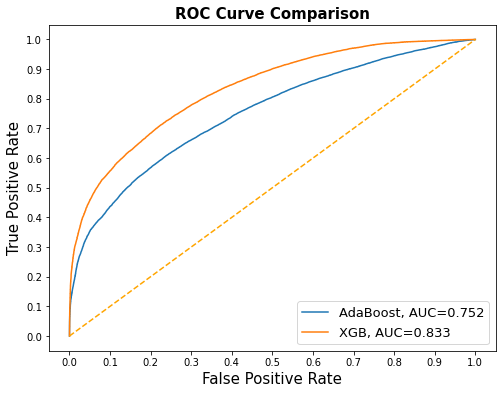

In [76]:
PLOT_MULTIPLE_ROC(boosted_models)

In [80]:
def PLOT_ACCURACY(training_acc, testing_acc):
    plt.plot(training_acc)
    plt.plot(testing_acc)
    plt.xlabel('10-fold CV')
    plt.ylabel('accuracy')
    plt.legend(['training_acc', 'testing_acc'])
    plt.title('Model accuracy')
    plt.show()

In [90]:
res_df = pd.concat([lr_res, svm, boosted_models]).reset_index()
res_df

,classifier,FPR,TPR,AUC,training_acc,testing_acc
0,LR,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.00147487791288...",0.808824,"[0.7262099857970065, 0.7268936635105608, 0.726...","[0.7187090432503277, 0.724188790560472, 0.7273..."
1,RF,"[0.0, 0.004391858673920881, 0.0069155386581888...","[0.0, 0.0905575038510701, 0.1370653207040084, ...",0.793977,"[0.999981791033905, 0.9999635833940277, 0.9999...","[0.7123197903014417, 0.7055063913470994, 0.724..."
2,SVM_linear,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.01025859526072...",0.741609,"[0.6813977202374449, 0.6805899490167516, 0.678...","[0.67021625163827, 0.678302196001311, 0.686004..."
3,SVM_rbf,"[0.0, 0.0, 6.555012946150569e-05, 6.5550129461...","[0.0, 3.2775064730752846e-05, 3.27750647307528...",0.508504,"[0.5147856804690629, 0.5142388929351784, 0.514...","[0.5018020969855832, 0.4995083579154376, 0.504..."
4,AdaBoost,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.01265117498607...",0.751534,"[0.6866965293710623, 0.6859796067006555, 0.685...","[0.6805373525557011, 0.6856768272697477, 0.695..."
5,XGB,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.00016387532365...",0.832639,"[0.7685640409337557, 0.7699563000728332, 0.768...","[0.7385321100917431, 0.7340216322517208, 0.747..."


classifier:  LR


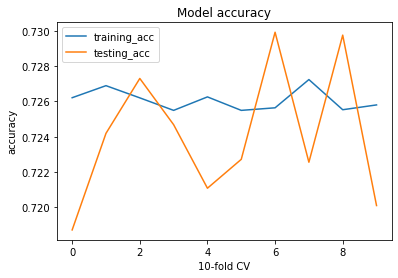



classifier:  RF


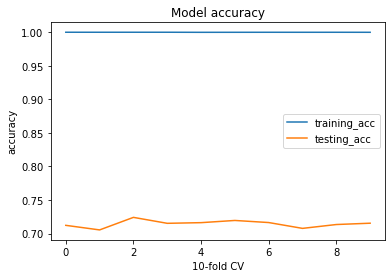



classifier:  SVM_linear


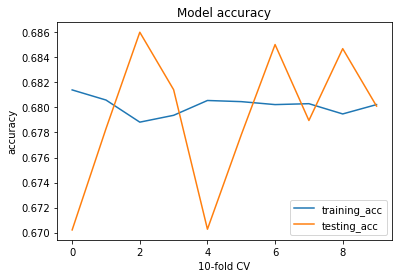



classifier:  SVM_rbf


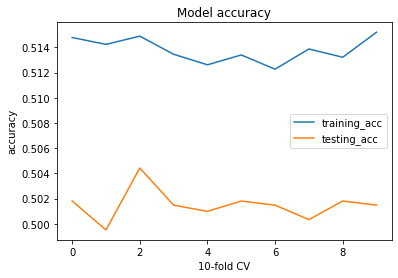



classifier:  AdaBoost


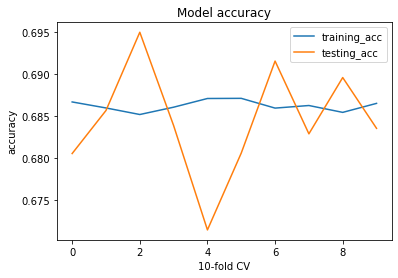



classifier:  XGB


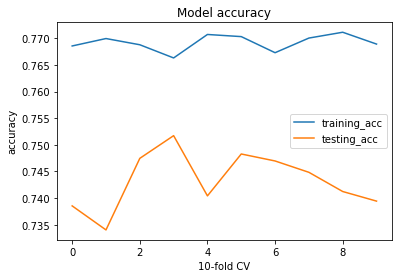

In [92]:
for i in range(res_df.shape[0]):
    classifier = res_df['classifier'][i]
    training = res_df['training_acc'][i]
    testing = res_df['testing_acc'][i]
    print('classifier: ', classifier)
    PLOT_ACCURACY(training, testing)
    print('\n')

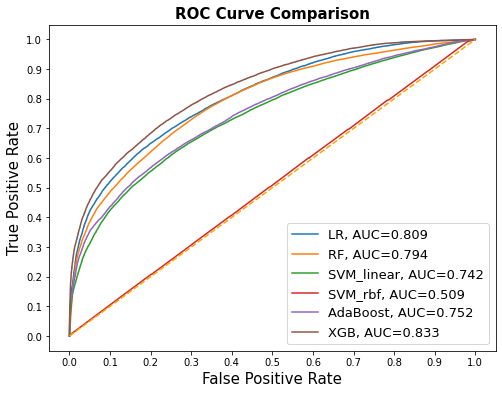

In [94]:
PLOT_MULTIPLE_ROC(pd.concat([lr_res, svm, boosted_models]))

### Conclusion
- The `AUC plot` above shows that `XGB` performs best with this data with highest AUC score. 
- `SVM_linear` has higher AUC score than `SVM_rbf`, and `LR` has higher AUC score than `RF` suggests that this dataset favors `linear model` than `non-linear model`
- the `confusion matrix` of all 6 models indicates a consistent trend that the variables tend to predict more negative class than positive class, despite our data is `case-control` study. 

- Next steps will be `feature selection` and `parameter tunining` for these models